## Importing necessary libraries

In [ ]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.layers import Flatten
from keras.applications import imagenet_utils
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data and preprocessing images according to mobilenet requirements
# Creating batches of data

labels = ['Flooding', 'No Flooding']
train_path = "/content/drive/MyDrive/dataset_for_floodDetection/train"
valid_path = '/content/drive/My Drive/dataset_for_floodDetection/valid'
test_path = '/content/drive/My Drive/dataset_for_floodDetection/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 321 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 2,050
Non-trainable params: 3,228,864
_________________________________________________________________


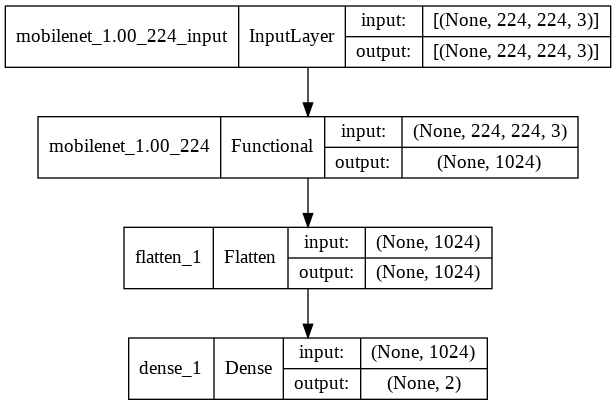

In [ ]:
mobile_model = Sequential()

mobile = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224,224,3), include_top=False, weights='imagenet',
    pooling=('max'), classes=2
)

for layer in mobile.layers:
    layer.trainable = False

mobile_model.add(mobile)
mobile_model.add(Flatten())
# mobile_model.add(Dense(512,activation='relu'))
mobile_model.add(Dense(2, activation='softmax'))

mobile_model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
mobile_model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

 
tf.keras.utils.plot_model(mobile_model, show_shapes=True)

In [ ]:
graph = mobile_model.fit(train_batches, epochs = 10, validation_data=valid_batches)

Epoch 1/10
27/33 [=======================>......] - ETA: 7s - loss: 1.1655 - accuracy: 0.6667

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/33 [==============================] - 65s 2s/step - loss: 1.1101 - accuracy: 0.6854 - val_loss: 0.7950 - val_accuracy: 0.7654
Epoch 2/10
33/33 [==============================] - 6s 174ms/step - loss: 0.4603 - accuracy: 0.8723 - val_loss: 0.4194 - val_accuracy: 0.8519
Epoch 3/10
33/33 [==============================] - 6s 176ms/step - loss: 0.2911 - accuracy: 0.9221 - val_loss: 0.5836 - val_accuracy: 0.8025
Epoch 4/10
33/33 [==============================] - 6s 177ms/step - loss: 0.2168 - accuracy: 0.9439 - val_loss: 0.2822 - val_accuracy: 0.9136
Epoch 5/10
33/33 [==============================] - 6s 169ms/step - loss: 0.1470 - accuracy: 0.9657 - val_loss: 0.4622 - val_accuracy: 0.8395
Epoch 6/10
33/33 [==============================] - 6s 175ms/step - loss: 0.1192 - accuracy: 0.9657 - val_loss: 0.2268 - val_accuracy: 0.9383
Epoch 7/10
33/33 [==============================] - 6s 167ms/step - loss: 0.1082 - accuracy: 0.9688 - val_loss: 0.2258 - val_accuracy: 0.9506
Epoch 8/10
33/33 [=

<Figure size 432x288 with 0 Axes>

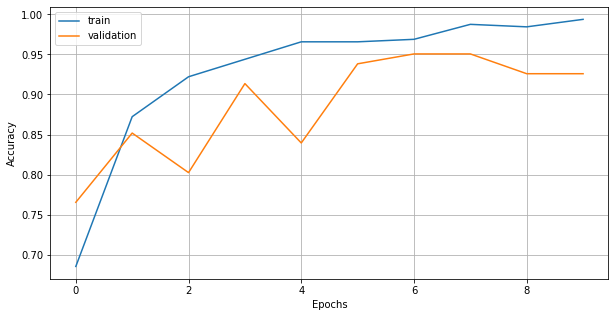

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.figure(figsize=(10,5))

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
# #Loading pre-trained lightweight mobilenet image classifier
# mobile = tf.keras.applications.mobilenet.MobileNet()
# mobile = Sequential()
# # mobile.summary()

In [ ]:
# Store all layers of the original mobilenet except the last 5 layers in variable x
# There is no predefined logic behind this, it just gives the optimal results for this task
# Also, we will be only training the last 5 layers of the mobilenet during finetuning as we want 
# it to keep all of the previously learned weights 
# x = mobile.layers[-6].output

In [ ]:
# Create an output layer with binary output layer, as we want our model to be a binary classifier, 
# i.e. to classify flooding and no flooding
# output = mobile.add(Dense(2, activation='softmax'))(x)

In [ ]:
# # Construct the new fine-tuned mode
# model = Model(inputs=mobile.input, outputs=output)

In [ ]:
# # Freez weights of all the layers except for the last five layers in our new model, 
# # meaning that only the last five layers of the model will be trained.
# for layer in model.layers:
#     layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
# # Compile the model
# model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # Train the Model

# model.fit(x=train_batches,
#           steps_per_epoch=len(train_batches),
#           validation_data=valid_batches,
#           validation_steps=len(valid_batches),
#           epochs=10,
#           verbose=2
# )

In [ ]:
# # Saving and loading our trained for future use

# model.save("fine_tuned_flood_detection_model")
# # model.load_weights('fine_tuned_flood_detection_model')

In [ ]:
# Make predictions and plot confusion matrix to look how well our model performed in classifying 
# flooding and no flooding images 

test_labels = test_batches.classes
predictions = mobile_model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Pring precision, F1 score and accuracy of our model
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  0.9629629629629629
F1 Score:  0.9454545454545454
Accuracy:  0.9577464788732394


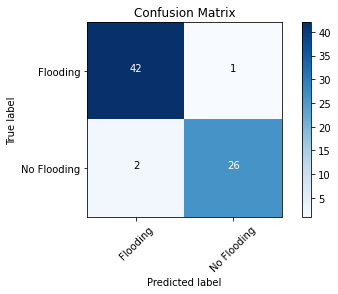

In [ ]:
# Confusion Matrix 
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Evaluate our finetuned model

In [ ]:
# Prepare image for mobilenet prediction

def preprocess_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

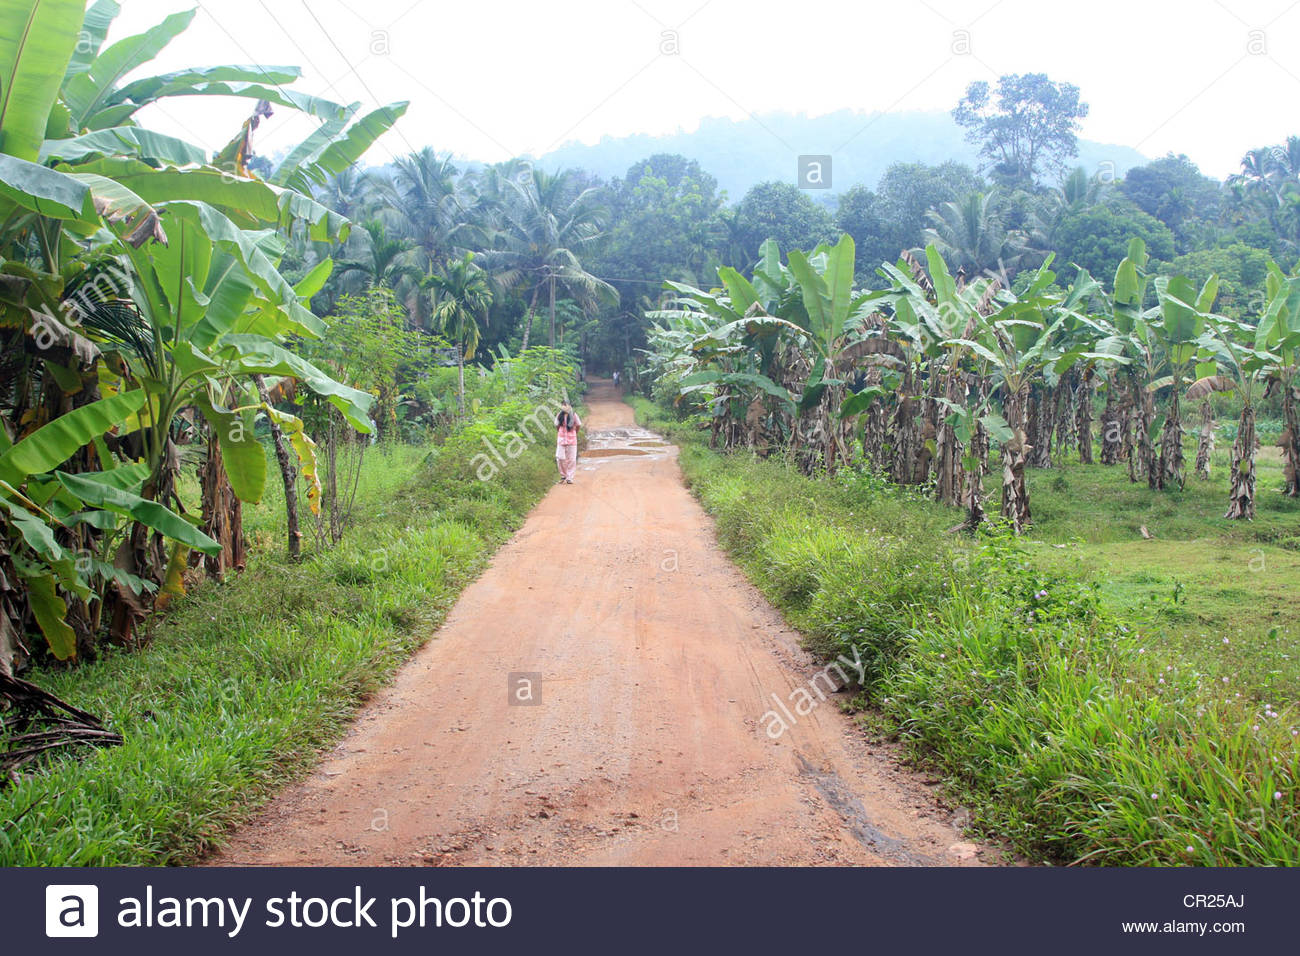

In [ ]:
# Display image which we want to predict
from IPython.display import Image
Image(filename='/content/drive/MyDrive/dataset_for_floodDetection/evaluate/4.jpg', width=300,height=200) 

In [ ]:
# Preprocess image and make prediction

preprocessed_image = preprocess_image('/content/drive/MyDrive/dataset_for_floodDetection/evaluate/4.jpg')
predictions = mobile_model.predict(preprocessed_image)

In [ ]:
# Print predicted accuracy scores for both classes, i.e. (1) Flooding, (2) No Flooding
predictions

array([[9.313966e-06, 9.999907e-01]], dtype=float32)

In [ ]:
# Get the maximum probability score for predicted class from predictions array
result = np.argmax(predictions)

In [ ]:
# Print the predicted class label
labels[result]

'No Flooding'